In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
solar3 = pd.read_csv("Solar 3.csv")

In [3]:
solar3

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,0,0.00,2019-06-05 14:00:00,2019,6,5,14,0,Solar3
1,4,0.00,2019-06-05 15:00:00,2019,6,5,15,0,Solar3
2,8,0.00,2019-06-05 16:00:00,2019,6,5,16,0,Solar3
3,12,0.00,2019-06-05 17:00:00,2019,6,5,17,0,Solar3
4,16,0.00,2019-06-05 18:00:00,2019,6,5,18,0,Solar3
...,...,...,...,...,...,...,...,...,...
12341,49364,0.00,2020-10-31 19:00:00,2020,10,31,19,0,Solar3
12342,49368,0.35,2020-10-31 20:00:00,2020,10,31,20,0,Solar3
12343,49372,1.11,2020-10-31 21:00:00,2020,10,31,21,0,Solar3
12344,49376,2.09,2020-10-31 22:00:00,2020,10,31,22,0,Solar3


In [4]:
solar3['datetime']=pd.to_datetime(solar3['datetime'], format='%Y-%m-%d %H:%M:%S')

solar3= solar3.set_index('datetime')

solar3= solar3.asfreq('H') 


<AxesSubplot:xlabel='datetime'>

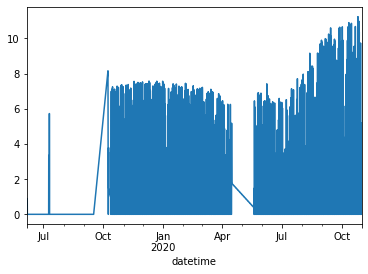

In [5]:
solar3["series_value"].plot()

In [6]:
'''
#Split Train-Val for Solar3
# ==============================================================================
start_train='2019-10-10 00:00'
end_train='2020-04-01 00:00'
start_val='2020-06-01 01:00'
end_val='2020-08-01 00:00'

start_test='2020-08-01 01:00'


'''

end_train='2020-08-01 00:00'
start_test='2020-08-01 01:00'

solar3train = solar3.loc[:end_train,:]
solar3test=solar3.loc[start_test:, :]

In [7]:
solar3train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2019-06-05 14:00:00,0,0.00,2019,6,5,14,0,Solar3
2019-06-05 15:00:00,4,0.00,2019,6,5,15,0,Solar3
2019-06-05 16:00:00,8,0.00,2019,6,5,16,0,Solar3
2019-06-05 17:00:00,12,0.00,2019,6,5,17,0,Solar3
2019-06-05 18:00:00,16,0.00,2019,6,5,18,0,Solar3
...,...,...,...,...,...,...,...,...
2020-07-31 20:00:00,40536,0.00,2020,7,31,20,0,Solar3
2020-07-31 21:00:00,40540,0.01,2020,7,31,21,0,Solar3
2020-07-31 22:00:00,40544,1.12,2020,7,31,22,0,Solar3


In [8]:
solar3test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-08-01 01:00:00,40556,6.86,2020,8,1,1,0,Solar3
2020-08-01 02:00:00,40560,7.64,2020,8,1,2,0,Solar3
2020-08-01 03:00:00,40564,7.55,2020,8,1,3,0,Solar3
2020-08-01 04:00:00,40568,6.67,2020,8,1,4,0,Solar3
2020-08-01 05:00:00,40572,4.96,2020,8,1,5,0,Solar3
...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,49364,0.00,2020,10,31,19,0,Solar3
2020-10-31 20:00:00,49368,0.35,2020,10,31,20,0,Solar3
2020-10-31 21:00:00,49372,1.11,2020,10,31,21,0,Solar3


In [9]:
train_s3 = solar3train.reset_index()[["datetime","series_value"]]
train_s3.columns=["ds","y"]
train_s3

,ds,y
0,2019-06-05 14:00:00,0.00
1,2019-06-05 15:00:00,0.00
2,2019-06-05 16:00:00,0.00
3,2019-06-05 17:00:00,0.00
4,2019-06-05 18:00:00,0.00
...,...,...
10134,2020-07-31 20:00:00,0.00
10135,2020-07-31 21:00:00,0.01
10136,2020-07-31 22:00:00,1.12
10137,2020-07-31 23:00:00,2.23


In [10]:
model_s3 = Prophet()
model_s3.fit(train_s3)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_s3 = model_s3.make_future_dataframe(periods=2207,freq="H")
future_s3
#end 2020-10-31 23:00:00

,ds
0,2019-06-05 14:00:00
1,2019-06-05 15:00:00
2,2019-06-05 16:00:00
3,2019-06-05 17:00:00
4,2019-06-05 18:00:00
...,...
12341,2020-10-31 19:00:00
12342,2020-10-31 20:00:00
12343,2020-10-31 21:00:00
12344,2020-10-31 22:00:00


In [12]:
forecast_s3 = model_s3.predict(future_s3)
forecast_s3
#forecast_s3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-05 14:00:00,0.006780,-2.952010,0.852145,0.006780,0.006780,-0.979881,-0.979881,-0.979881,-1.009077,-1.009077,-1.009077,0.029196,0.029196,0.029196,0.0,0.0,0.0,-0.973101
1,2019-06-05 15:00:00,0.006769,-2.850581,0.988881,0.006769,0.006769,-0.975585,-0.975585,-0.975585,-1.005413,-1.005413,-1.005413,0.029828,0.029828,0.029828,0.0,0.0,0.0,-0.968816
2,2019-06-05 16:00:00,0.006758,-2.695560,0.963365,0.006758,0.006758,-0.928281,-0.928281,-0.928281,-0.958786,-0.958786,-0.958786,0.030506,0.030506,0.030506,0.0,0.0,0.0,-0.921522
3,2019-06-05 17:00:00,0.006748,-2.744215,1.092897,0.006748,0.006748,-0.902273,-0.902273,-0.902273,-0.933482,-0.933482,-0.933482,0.031208,0.031208,0.031208,0.0,0.0,0.0,-0.895526
4,2019-06-05 18:00:00,0.006737,-2.753339,0.943593,0.006737,0.006737,-0.935120,-0.935120,-0.935120,-0.967036,-0.967036,-0.967036,0.031915,0.031915,0.031915,0.0,0.0,0.0,-0.928383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12341,2020-10-31 19:00:00,0.903697,-3.342299,3.142034,-1.762961,3.518669,-1.035019,-1.035019,-1.035019,-0.996735,-0.996735,-0.996735,-0.038284,-0.038284,-0.038284,0.0,0.0,0.0,-0.131321
12342,2020-10-31 20:00:00,0.903665,-3.274259,3.157475,-1.764072,3.522830,-0.916028,-0.916028,-0.916028,-0.879236,-0.879236,-0.879236,-0.036791,-0.036791,-0.036791,0.0,0.0,0.0,-0.012363
12343,2020-10-31 21:00:00,0.903632,-3.038186,3.655681,-1.765183,3.526991,-0.531449,-0.531449,-0.531449,-0.496066,-0.496066,-0.496066,-0.035384,-0.035384,-0.035384,0.0,0.0,0.0,0.372183
12344,2020-10-31 22:00:00,0.903599,-2.314061,4.227071,-1.766295,3.531152,0.111032,0.111032,0.111032,0.145093,0.145093,0.145093,-0.034061,-0.034061,-0.034061,0.0,0.0,0.0,1.014631


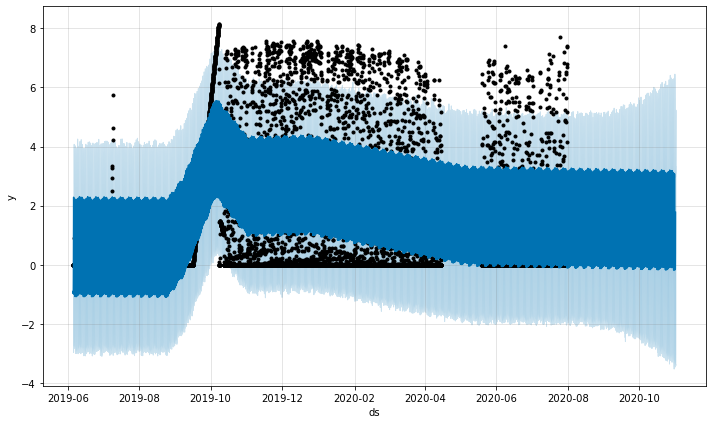

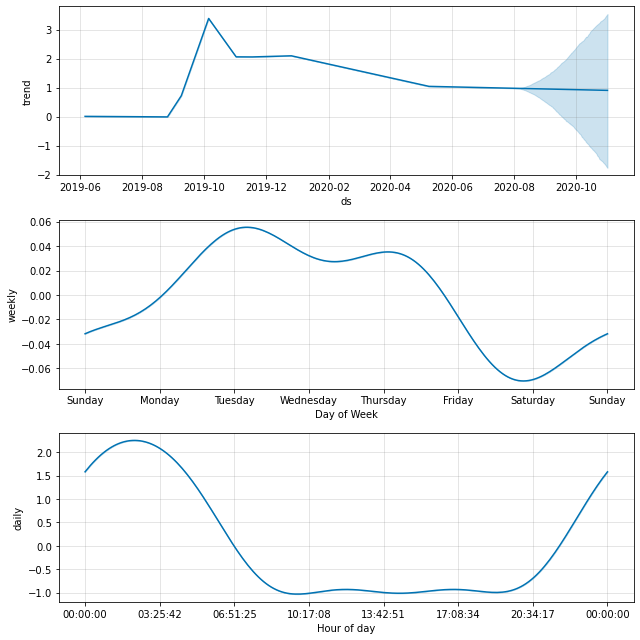

In [13]:
# plot the prediction 
fig= model_s3.plot(forecast_s3)
#plot predictions 
fig= model_s3.plot_components(forecast_s3)

In [14]:
forecast_s3["additive_terms"]
additive_terms =  pd.DataFrame(forecast_s3["additive_terms"])
print(additive_terms)

solar3["series_value"]
actual_value = pd.DataFrame(solar3.reset_index()["series_value"])
actual_value
print(actual_value)

       additive_terms
0           -0.979881
1           -0.975585
2           -0.928281
3           -0.902273
4           -0.935120
...               ...
12341       -1.035019
12342       -0.916028
12343       -0.531449
12344        0.111032
12345        0.868184

[12346 rows x 1 columns]
       series_value
0              0.00
1              0.00
2              0.00
3              0.00
4              0.00
...             ...
12341          0.00
12342          0.35
12343          1.11
12344          2.09
12345          5.08

[12346 rows x 1 columns]


In [15]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(solar3.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_s3["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 


,datetime,subtraction,additive_terms,actual_value
0,2019-06-05 14:00:00,0.979881,-0.979881,0.00
1,2019-06-05 15:00:00,0.975585,-0.975585,0.00
2,2019-06-05 16:00:00,0.928281,-0.928281,0.00
3,2019-06-05 17:00:00,0.902273,-0.902273,0.00
4,2019-06-05 18:00:00,0.935120,-0.935120,0.00
...,...,...,...,...
12341,2020-10-31 19:00:00,1.035019,-1.035019,0.00
12342,2020-10-31 20:00:00,1.266028,-0.916028,0.35
12343,2020-10-31 21:00:00,1.641449,-0.531449,1.11
12344,2020-10-31 22:00:00,1.978968,0.111032,2.09


In [16]:
output.to_csv("s3_actual_additive.csv",index=False)